**Autor:** Walter Jr.  
**Versão:** v1.0.0  
**Release:** Initial academic release  
**Data:** 2026-02-04  
**Ambiente:** Google Colab / Python 3.x


### Aplicação de Manifold Learning (UMAP) na Análise de Dados Sintéticos Biológicos de Alta Dimensionalidade

Este trabalho explora a aplicação de técnicas de Manifold Learning, em particular o Uniform Manifold Approximation and Projection (UMAP), para a análise de dados biológicos de alta dimensionalidade, como dados de expressão gênica e sinais neurais. Em contextos biológicos modernos, cada amostra experimental pode ser descrita por milhares de variáveis simultâneas, refletindo a complexidade intrínseca dos sistemas biológicos e impondo desafios significativos à análise estatística tradicional.

Do ponto de vista matemático, tais dados raramente ocupam todo o espaço ambiente de alta dimensão; em vez disso, assumem-se distribuídos sobre variedades (manifolds) de dimensão intrínseca muito menor, determinadas por restrições biológicas, regulatórias e dinâmicas. Métodos lineares clássicos, como a Análise de Componentes Principais (PCA), são limitados na captura dessas estruturas quando a geometria subjacente é não linear, podendo obscurecer padrões relevantes.

O UMAP fundamenta-se em conceitos de geometria diferencial, teoria dos grafos e topologia algébrica, buscando preservar relações de vizinhança local e, simultaneamente, a coerência global da variedade subjacente durante a projeção para espaços de baixa dimensão. Essa abordagem permite a identificação de clusters funcionais, transições contínuas de estado e trajetórias latentes, frequentemente associadas a processos biológicos como diferenciação celular, plasticidade neural e respostas adaptativas.

A importância acadêmica deste estudo reside na demonstração prática de como técnicas modernas de redução de dimensionalidade não linear podem revelar estruturas latentes biologicamente interpretáveis, contribuindo para a formulação de hipóteses, exploração de dados complexos e integração entre modelagem estatística, aprendizado de máquina e biologia computacional. Além disso, o uso de UMAP como ferramenta exploratória fortalece análises subsequentes de inferência estatística e modelagem preditiva, ampliando a capacidade de extração de conhecimento em cenários de alta dimensionalidade.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap


## Simulando dados biológicos de alta dimensão

In [ ]:
# Reprodutibilidade
np.random.seed(42)

# Simulação de dados: células × genes
n_samples = 600        # células
n_genes = 2000         # genes
n_clusters = 3         # estados celulares

X, y = make_blobs(
    n_samples=n_samples,
    centers=n_clusters,
    n_features=n_genes,
    cluster_std=5.0,
    random_state=42
)


# Padronização

In [ ]:
X_scaled = StandardScaler().fit_transform(X)


## Redução de dimensionalidade com UMAP

In [ ]:
umap_model = umap.UMAP(
    n_neighbors=15,     # estrutura local
    min_dist=0.1,       # compactação dos clusters
    n_components=2,     # projeção em 2D
    metric='euclidean',
    random_state=42
)

X_umap = umap_model.fit_transform(X_scaled)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


## Visualização: estados celulares latentes

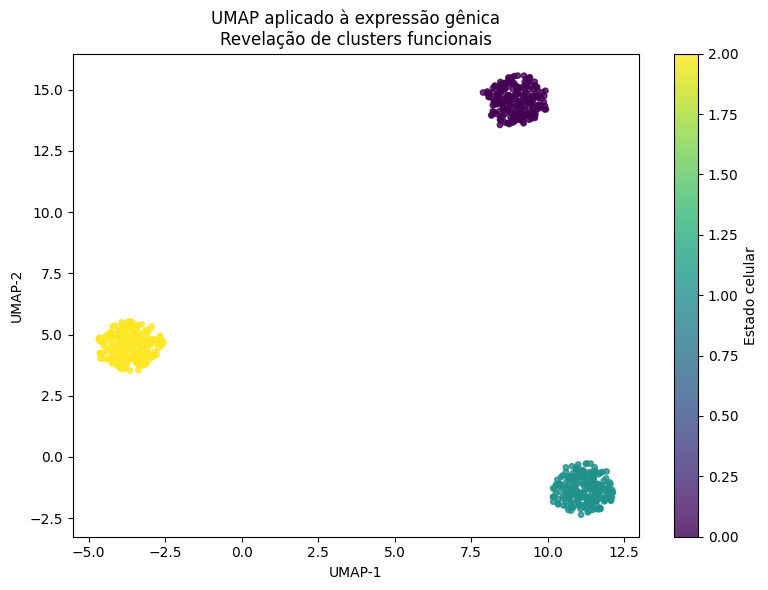

In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(

    X_umap[:, 0],
    X_umap[:, 1],
    c=y,
    cmap='viridis',
    s=15,
    alpha=0.8
)

plt.colorbar(scatter, label="Estado celular")
plt.title("UMAP aplicado à expressão gênica\nRevelação de clusters funcionais")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.tight_layout()
plt.show()
